In [1]:
class Particle:
    def __init__(self, x, y):
        self.x = x
        self.y = y


In [2]:

import csv
def read_csv(filename):
    # First line is the header, structure is:
    #   0: n_particles, n_iterations, w, c1, c2
    # Each iteration after that is:
    #   : Particle position, f
    # Read firt line
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        n_particles, w, c1, c2 = map(float, header)
        # n_particles and n_iterations are integers
        n_particles = int(n_particles)
        
        
        data = []
        for row in reader:
            # strip last element of row
            row = row[:-1]
            data.append(list(map(float, row)))

    return n_particles, w, c1, c2, data


In [3]:
n_particles, w, c1, c2, data = read_csv('../out/pso.csv')

In [4]:
# Function from data to list of (lists, iterations) particles
def data_to_particles(data, n_particles, n_iterations):
    particles = []
    for it in range(n_iterations):
        cur_it = []
        # Extract it row from data
        row = data[it]
        for i in range(n_particles):
            # Extract particle from row
            particle = Particle(row[i*2], row[i*2+1])
            cur_it.append(particle)
        particles.append(cur_it)

    return particles


In [5]:
particles = data_to_particles(data, n_particles, len(data))
# Particles[i] is a list of particles at iteration i
# Particles[i][j] is the j-th particle at iteration i

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate(particles, fps):
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'o', markersize=1)
    ax.set_xlim(-500, 500)
    ax.set_ylim(-500, 500)

    def frame(i):
        x = [p.x for p in particles[i]]
        y = [p.y for p in particles[i]]
        line.set_data(x, y)
        return line,
    ani = animation.FuncAnimation(fig, frame, frames=len(particles), interval=1000/fps)
    return ani

def plot_frame(particles, it):
    fig = plt.figure()

    x = [p.x for p in particles[it]]
    y = [p.y for p in particles[it]]

    plt.plot(x, y, 'o', markersize=1)
    plt.xlim(-500, 500)
    plt.ylim(-500, 500)
    plt.show()
    



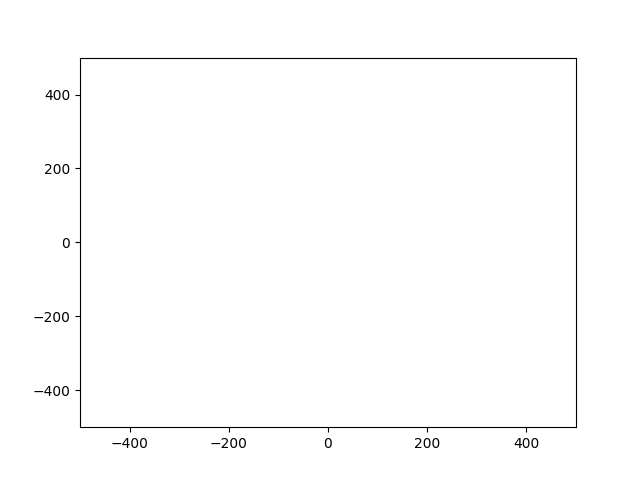

In [8]:
%matplotlib widget

ani = animate(particles, 60)


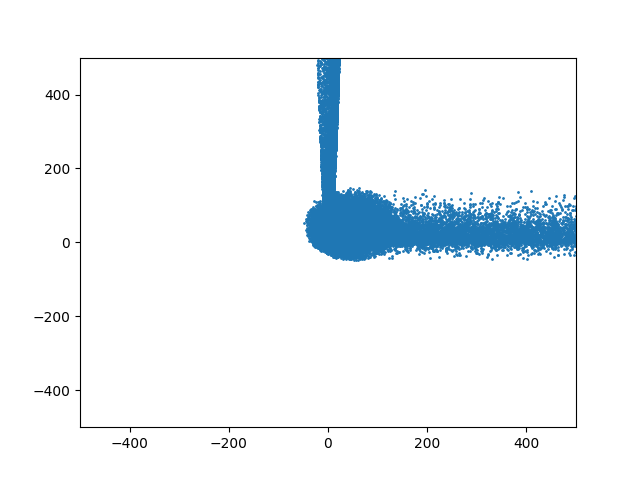

In [10]:
plot_frame(particles, 0 )

In [49]:
ani.save('pso.gif', writer='imagemagick', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.
